In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
def count_known_vs_novel(df):
    data = []
    for _, row in df.iterrows():
        profiles = row['Profiles'].split('/')
        count_type = 'known' if row['Novel'] == 0 else 'novel'
        data.extend([{'domains': profile, 'fill': count_type} for profile in profiles])
    
    out = pd.DataFrame(data)
    out = out.groupby(['domains', 'fill']).size().unstack(fill_value=0).reset_index()
    out['total'] = out['known'] + out['novel']
    out = out.sort_values(by='total', ascending=True).reset_index(drop=True)
    out['domains'] = pd.Categorical(out['domains'], categories=out['domains'].unique())
    return out

In [3]:
df1 = pd.read_csv('/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/novel_antitoxins_1/novel_summary_new.csv')

In [4]:
novel_vs_known = count_known_vs_novel(df1)
df1.head()

,ID,Hit_clusters,Profiles,Copies,Upstream,Downstream,Novel
0,245P,17H,YdaT_toxin,1,0,1,1
1,173P,113H,Fic,3,3,0,1
2,59P,23H,RelE,100,100,0,1
3,67P,51H,YdaT_toxin,75,75,0,1
4,2P,2H,Cpta_toxin,949,949,0,0


In [5]:
df1['Upstream'].sum()

15747

In [6]:
df1['Downstream'].sum()

10314

In [7]:
upstream = count_known_vs_novel(df1[df1['Upstream'] > 0]).add_suffix('_up').rename(columns={'domains_up': 'domains'})
downstream = count_known_vs_novel(df1[df1['Downstream'] > 0]).add_suffix('_dw').rename(columns={'domains_dw': 'domains'})
merged = novel_vs_known.merge(upstream, how='left', on='domains').merge(downstream, how='left', on='domains')
merged = merged.fillna(0)
merged

fill,domains,known,novel,total,known_up,novel_up,total_up,known_dw,novel_dw,total_dw
0,MqsR_toxin,1,0,1,0.0,0.0,0.0,1.0,0.0,1.0
1,YoeB_toxin,1,0,1,1.0,0.0,1.0,0.0,0.0,0.0
2,DUF4258,0,1,1,0.0,0.0,0.0,0.0,1.0,1.0
3,GnsAB_toxin,0,1,1,0.0,1.0,1.0,0.0,0.0,0.0
4,YjhX_toxin,0,2,2,0.0,1.0,1.0,0.0,1.0,1.0
5,RES,1,1,2,1.0,0.0,1.0,0.0,1.0,1.0
6,NTP_transf_2,1,1,2,0.0,0.0,0.0,1.0,1.0,2.0
7,Polyketide_cyc2,0,2,2,0.0,1.0,1.0,0.0,1.0,1.0
8,HD_3,0,2,2,0.0,0.0,0.0,0.0,2.0,2.0
9,AbiEii,0,3,3,0.0,2.0,2.0,0.0,1.0,1.0


In [8]:
y = merged['domains']
x1 = merged['total_up'].astype(int)
x2 = merged['total_dw'].astype(int)

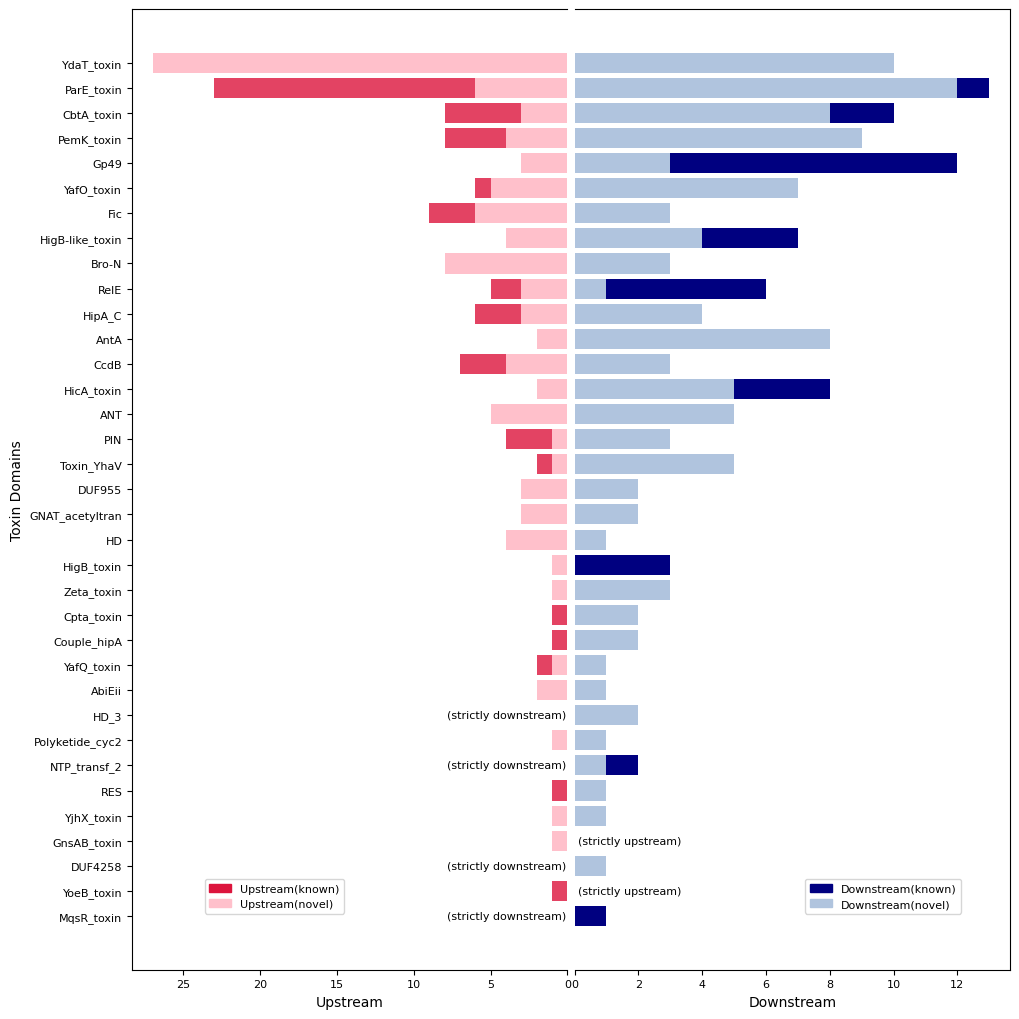

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.patches as mpatches

# create the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 10))

# plot the data in the first subplot
bars1 = ax1.barh(y, x1, color='crimson', alpha=0.8)
bars1_h1 = ax1.barh(merged['domains'], merged['novel_up'], color='pink', edgecolor=None, alpha=1, label='Novel')
ax1.spines['right'].set_visible(False)
ax1.yaxis.tick_left()

# plot the data in the second subplot
bars2 = ax2.barh(y, x2, color='navy', alpha=1)
bars1_h2 = ax2.barh(merged['domains'], merged['novel_dw'], color='lightsteelblue', edgecolor=None, alpha=1, label='Novel')
ax2.spines['left'].set_visible(False)
ax2.yaxis.tick_right()

# set the common y-axis
ax1.invert_xaxis()
ax2.yaxis.tick_left()

# set the x-axis labels
ax1.set_xlabel('Upstream', fontsize=10)
ax2.set_xlabel('Downstream', fontsize=10)

# set ylabel
ax1.tick_params(axis='y', which='minor', labelsize=10)
ax1.set_ylabel('Toxin Domains', fontsize=10)

# remove y axis tickmarks of axis 2
ax2.yaxis.set_ticks_position('none')

# adjust x and y ticks
ax1.xaxis.set_tick_params(labelsize=8)
ax2.xaxis.set_tick_params(labelsize=8)
ax1.yaxis.set_tick_params(labelsize=8)


# add the values inside the bars
# add the values inside the bars
# add the values inside the bars
# add the values inside the bars
# add the values inside the bars

    
# add the values inside the bars
for bar1, bar2 in zip(bars1, bars2):
    width1 = bar1.get_width()
    width2 = bar2.get_width()
    
    if width1 == 0.0:
        ax1.text(bar1.get_x() + bar1.get_width() + 0.1, bar1.get_y() + bar1.get_height() / 2, '(strictly downstream)', ha='right', va='center', fontsize=8)
        
    if width2 == 0.0:
        ax2.text(bar2.get_x() + bar2.get_width() + 0.1, bar2.get_y() + bar2.get_height() / 2, '(strictly upstream)', ha='left', va='center', fontsize=8)
# add the manual legend for upstream novel and downstream novel
#ax2.legend(handles=[bars1_h1, bars1], labels=['Novel (Upstream)', 'Known'], loc='center', fontsize=10, facecolor='white', edgecolor='none')
#ax1.legend(handles=[bars1], labels=['Known'], loc='lower right', fontsize=10, facecolor='white', edgecolor='none')
#ax2.legend(handles=[bars1_h2], labels=['Novel (Downstream)'], loc='lower left', fontsize=10, facecolor='white', edgecolor='none')
# adjust the layout


#Add legends
import matplotlib.patches as mpatches

colors1 = {"crimson": 'Upstream(known)', "pink": 'Upstream(novel)'}
colors2 = {"navy": 'Downstream(known)', "lightsteelblue": 'Downstream(novel)'}

legend_patches1 = [mpatches.Patch(color=color, label=label) for color, label in colors1.items()]
legend_patches2 = [mpatches.Patch(color=color, label=label) for color, label in colors2.items()]

ax1.legend(handles=legend_patches1, bbox_to_anchor=(0.5, 0.1), fontsize=8)
ax2.legend(handles=legend_patches2, bbox_to_anchor=(0.9, 0.1), fontsize=8)



# adjust the layout
fig.subplots_adjust(wspace=0, hspace=0)

fig.tight_layout(pad = 0)
plt.savefig('/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/Publication_material/pictures/main/Fig6.tiff', dpi = 300)


In [10]:
print(merged.shape)
merged.head()

(35, 10)


fill,domains,known,novel,total,known_up,novel_up,total_up,known_dw,novel_dw,total_dw
0,MqsR_toxin,1,0,1,0.0,0.0,0.0,1.0,0.0,1.0
1,YoeB_toxin,1,0,1,1.0,0.0,1.0,0.0,0.0,0.0
2,DUF4258,0,1,1,0.0,0.0,0.0,0.0,1.0,1.0
3,GnsAB_toxin,0,1,1,0.0,1.0,1.0,0.0,0.0,0.0
4,YjhX_toxin,0,2,2,0.0,1.0,1.0,0.0,1.0,1.0


In [11]:
sum_total = merged['total'].sum()
sum_total

293

In [12]:
novel_total = merged['novel'].sum()
novel_total

219

In [13]:
percentage = (novel_total/sum_total)*100
percentage

74.74402730375427